In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

file_path = "data/healthcare_dataset.csv"  
df = pd.read_csv(file_path)

print(df.head())
print(df.info())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer

def load_and_process_data(file_path):
    data = pd.read_csv(file_path)

    categorical_cols = ['Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

    imputer = SimpleImputer(strategy='mean')  
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

    columns_to_drop = [
        'Name', 'Room Number', 'Discharge Date', 'Doctor', 'Gender',
        'Date of Admission', 'Test Results', 'Blood Type', 'Hospital'
    ]
    data = data.drop(columns=columns_to_drop, axis=1)

    return data

file_path = "data/healthcare_dataset.csv" 
df = load_and_process_data(file_path)
df.head()


,Age,Billing Amount,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30.0,18856.281306,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False
1,62.0,33643.327287,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False
2,76.0,27955.096079,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,28.0,37909.782410,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
4,43.0,14238.317814,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True


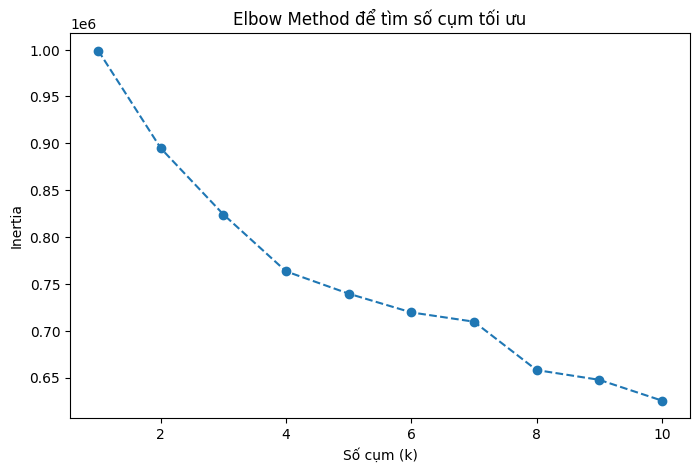

Thông tin cụm:
                Age  Billing Amount  Medical Condition_Asthma  \
Cluster                                                        
0        51.694819    25613.011503                  0.165928   
1        51.553665    25484.684824                  0.175449   
2        51.372884    25608.790004                  0.141043   

         Medical Condition_Cancer  Medical Condition_Diabetes  \
Cluster                                                         
0                        0.163487                    0.168189   
1                        0.176594                    0.117634   
2                        0.143583                    0.288166   

         Medical Condition_Hypertension  Medical Condition_Obesity  \
Cluster                                                              
0                              0.163939                   0.170992   
1                              0.177612                   0.174463   
2                              0.142121                  

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm số cụm tối ưu')
plt.show()

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

cluster_summary = df.groupby('Cluster').mean()
print("Thông tin cụm:\n", cluster_summary)

X = df_scaled
y = df['Billing Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import pandas as pd

average = cluster_summary[['Age', 'Billing Amount']]
print("Dự đoán trung bình ở mỗi cụm:")
print(average)
for cluster_id in cluster_summary.index:
    print(f"\nThông tin về cụm {cluster_id}:")
    cluster_info = cluster_summary.loc[cluster_id]
    print("Các đặc điểm chủ yếu:")
    for col, value in cluster_info.items():
        if value > 0.2:  
            print(f"- {col}: {value:.2f}")

    print(f"\nCụm {cluster_id} có độ tuổi trung bình là {cluster_info['Age']:.2f} và viện phí trung bình là {cluster_info['Billing Amount']:.2f}")

Dự đoán trung bình ở mỗi cụm:
               Age  Billing Amount
Cluster                           
0        51.694819    25613.011503
1        51.553665    25484.684824
2        51.372884    25608.790004

Thông tin về cụm 0:
Các đặc điểm chủ yếu:
- Age: 51.69
- Billing Amount: 25613.01
- Insurance Provider_Blue Cross: 1.00
- Admission Type_Emergency: 0.33
- Admission Type_Urgent: 0.33
- Medication_Lipitor: 0.20

Cụm 0 có độ tuổi trung bình là 51.69 và viện phí trung bình là 25613.01

Thông tin về cụm 1:
Các đặc điểm chủ yếu:
- Age: 51.55
- Billing Amount: 25484.68
- Insurance Provider_Cigna: 0.36
- Insurance Provider_UnitedHealthcare: 0.35
- Admission Type_Emergency: 0.33
- Admission Type_Urgent: 0.33
- Medication_Ibuprofen: 0.20
- Medication_Lipitor: 0.20
- Medication_Penicillin: 0.20

Cụm 1 có độ tuổi trung bình là 51.55 và viện phí trung bình là 25484.68

Thông tin về cụm 2:
Các đặc điểm chủ yếu:
- Age: 51.37
- Billing Amount: 25608.79
- Medical Condition_Diabetes: 0.29
- Insurance

Viện phí trung bình thực tế và dự đoán cho từng cụm:
         Actual Billing Amount  Predicted Billing Amount
Cluster                                                 
0                 26039.779736              26040.160482
1                 25659.871363              25659.608408
2                 25495.187864              25494.968261


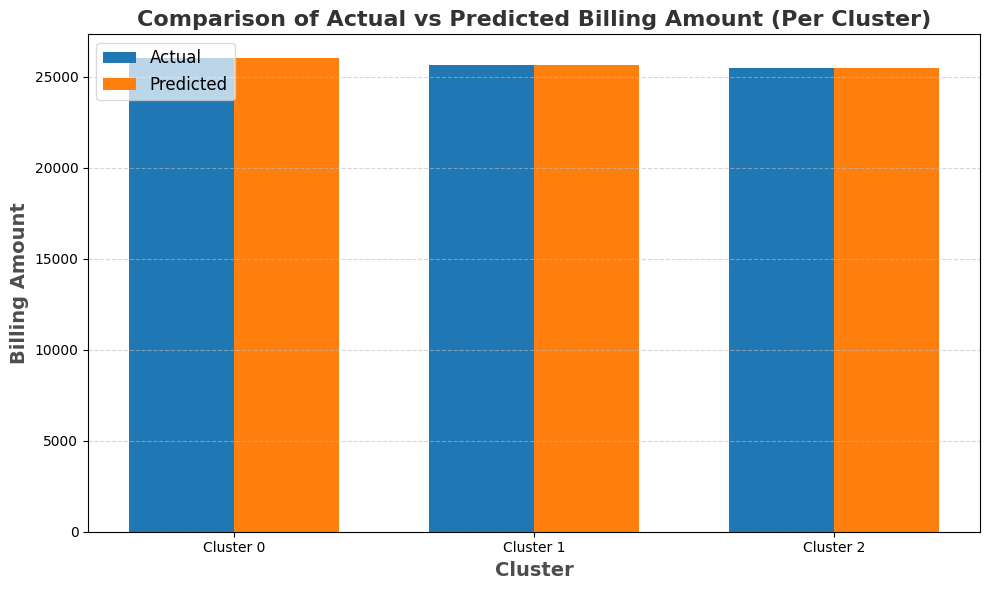

In [18]:
test_indices = X_test.index  
clusters_test = df.loc[test_indices, 'Cluster'] 

df_clusters = pd.DataFrame({
    'Cluster': clusters_test.values,  
    'Actual Billing Amount': y_test.values,
    'Predicted Billing Amount': y_pred
})

cluster_summary = df_clusters.groupby('Cluster').mean()

# In ra kết quả
print("Viện phí trung bình thực tế và dự đoán cho từng cụm:")
print(cluster_summary)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
x = np.arange(len(cluster_summary))  
width = 0.35  

plt.bar(x - width/2, cluster_summary['Actual Billing Amount'], width, label='Actual', color='#1f77b4')
plt.bar(x + width/2, cluster_summary['Predicted Billing Amount'], width, label='Predicted', color='#ff7f0e')

plt.xlabel('Cluster', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.ylabel('Billing Amount', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.title('Comparison of Actual vs Predicted Billing Amount (Per Cluster)', fontsize=16, fontweight='bold', color='#333333')
plt.xticks(x, labels=[f'Cluster {int(i)}' for i in cluster_summary.index])

plt.legend(loc='upper left', fontsize=12, fancybox=True, framealpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.6, color='#bbbbbb')

plt.tight_layout()
plt.show()


Viện phí thực tế và dự đoán cho 10 bệnh nhân đầu tiên:
   Actual Billing Amount  Predicted Billing Amount
0           18856.281306              18842.710983
1           33643.327287              33654.454296
2           27955.096079              27938.064356
3           37909.782410              37917.863933
4           14238.317814              14258.129955
5           48145.110951              48144.440286
6           19580.872345              19560.106133
7           45820.462722              45815.197115
8           50119.222792              50081.965429
9           19784.631062              19761.144868


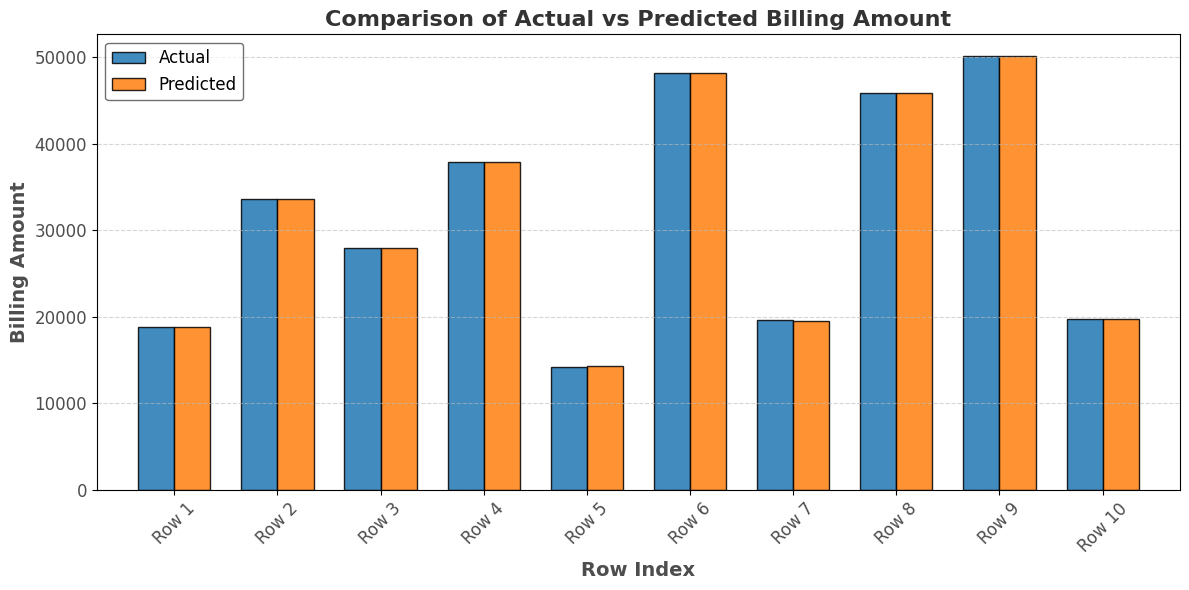

In [28]:
import matplotlib.pyplot as plt
import numpy as np

predictions_for_top_10 = random_search.best_estimator_.predict(X[:10])
results = pd.DataFrame({
    'Actual Billing Amount': y[:10].values,
    'Predicted Billing Amount': predictions_for_top_10
})
print("Viện phí thực tế và dự đoán cho 10 bệnh nhân đầu tiên:")
print(results)

plt.figure(figsize=(12, 6))
x = np.arange(len(results)) 
width = 0.35  
actual_color = '#1f77b4'  
predicted_color = '#ff7f0e' 
plt.bar(
    x - width / 2, results['Actual Billing Amount'], width,
    label='Actual', color=actual_color, edgecolor='black', alpha=0.85
)
plt.bar(
    x + width / 2, results['Predicted Billing Amount'], width,
    label='Predicted', color=predicted_color, edgecolor='black', alpha=0.85
)

plt.xlabel('Row Index', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.ylabel('Billing Amount', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.title(
    'Comparison of Actual vs Predicted Billing Amount',
    fontsize=16, fontweight='bold', color='#333333'
)
plt.xticks(
    x, [f'Row {i + 1}' for i in range(len(results))],
    fontsize=12, rotation=45, color='#4d4d4d'
)
plt.yticks(fontsize=12, color='#4d4d4d')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='#bbbbbb')
plt.gca().set_xlim(-0.75, len(results) - 0.25)
plt.legend(
    loc='upper left', fontsize=12,
    fancybox=True, framealpha=0.7, edgecolor='#333333'
)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_dist = {
    'max_depth': [5, 6, 7, 8, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2', None] 
}

random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

y_pred = random_search.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10, 'criterion': 'squared_error'}
Mean Absolute Error (MAE): 12.844774822834347
Mean Squared Error (MSE): 237.16254866092666
R² Score: 0.9999988076855373
